# Street View House Numbers (SVHN) image classification

## Problem Statement

Street View House Numbers (SHVN) is a real-world image dataset that consists of images obtained from house numbers in Google street view images. The dataset can be used to automatically transcribe an address number from a geo-located patch of pixels and the associated transcribed number can be used to pinpoint the location of the building it represents.

The challenge in transcribing text from images is that the visual appearance of text in the image dataset varies based on large range of fonts, colours, styles, orientation and character arrangements. The problem is further complicated by environmental factors such as lighting, shadows, secularities and occlusions as well as image acquisition factors such as resolution, motion and focus blurs.

### Objective

The objective of the project is to learn how to implement a simple image classification pipeline based on deep neural network using Street View House Numbers (SVHN) dataset.

The goals of this project are as follows:



1.   Load Dataset
2.   Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
3. Data fetching and understand the train/val/test splits.
4. Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations)
5. Implement batch normalization for training the neural network
6. Print the classification accuracy metrics



# Project Implementation

### Import necessary libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import logging
import random
import h5py
import os
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD, Adam, Nadam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Add setting for libraries

In [2]:
#Turn off warnings
logging.disable(logging.WARNING)

#Draw plots inline
%matplotlib inline

# Set seed for random
random.seed(1)

### Load the dataset

In [3]:
#Open the file
data = h5py.File('SVHN_single_grey1.h5')

#Load the training and test data
X_train = data['X_train'][:]
y_train = data['y_train'][:]
X_test = data['X_test'][:]
y_test = data['y_test'][:]

### Understand the data

In [4]:
X_train.shape

(42000, 32, 32)

**The training dataset has 42k images of size 32*32**

In [5]:
y_train.shape

(42000,)

**There are 42k labels that provides the correct classification for images in our training dataset**

In [6]:
X_test.shape

(18000, 32, 32)

**The test dataset has 18k images of size 32*32**

In [7]:
y_test.shape

(18000,)

**There are 18k labels that provides the correct classification for images in our test dataset**

#### Display the first 12 images of training dataset

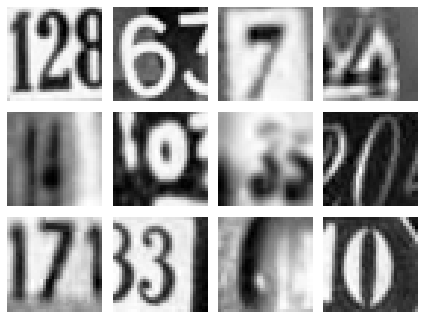

In [8]:
#set the size of the plot
plt.figure(figsize=(6,6))

for index in range(12):
  plt.subplot(4,4, index+1)
  plt.imshow(X_train[index], cmap='Greys')
  plt.axis('off')

plt.tight_layout()

#### Display the labels of first 12 images of training dataset

In [9]:
y_train[0:12]

array([2, 6, 7, 4, 4, 0, 3, 0, 7, 3, 1, 0], dtype=uint8)

**The challenge in recognizing the images is evident from the above sample as some of the images are blur while others have multiple digits displayed. Also the same digit may appear different in different images**

### Data Pre-Processing

The following steps will be performed as part of data pre-processing

1.   Flatten the data
2.   Normalize the data
3.   Change the labels to one hot encoding



#### Flatten the data

In [10]:
#Flatten the images on both training and test to 1024 as the image size is 32*32
X_train_flatten = X_train.reshape(X_train.shape[0], 1024).astype('float32')
X_test_flatten = X_test.reshape(X_test.shape[0], 1024).astype('float32')

In [11]:
X_train_flatten.shape

(42000, 1024)

In [12]:
X_test_flatten.shape

(18000, 1024)

#### Normalize the data

In [13]:
# Check the data of the first image in the training dataset
X_train_flatten[0]

array([33.0704, 30.2601, 26.852 , ..., 49.6682, 50.853 , 53.0377],
      dtype=float32)

The above data shows the pixel values for first image. These values range from 0 to 255. Hence to normalize the data (we need to change the values to range between 0 and 1) we will divide each of them by 255

In [14]:
#Normalize the data
X_train_norm = X_train_flatten/255
X_test_norm = X_test_flatten/255

In [15]:
#Verify that data of the first image in the training dataset
X_train_norm[0]

array([0.12968785, 0.11866706, 0.10530196, ..., 0.19477727, 0.19942354,
       0.20799099], dtype=float32)

In [16]:
#Delete X_train_flatten and X_test_flatten as it won't be used anymore
del(X_train_flatten, X_test_flatten)

#### One hot encoding of labels

The output of the network needs to classify the images between 0 to 9 i.e there are 10 classes. The loss function used in our neural network will be cross entropy which expects the data in one hot encoding.

In [17]:
n_classes = 10
y_train_enc = to_categorical(y_train, n_classes)
y_test_enc = to_categorical(y_test, n_classes)

In [18]:
y_train_enc[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

The above label from the training data denotes the label for digit 2

### Design the neural network architecure

The neural network architecture design will have the following propoerties

**Input Layer :**

* No. of neurons : **1024**


**Hidden Layer 1 :**

* No. of neurons : **64**

* Activation Function : **ReLU**

* Batch Normalization : **Yes**

**Hidden Layer 2 :**

* No. of neurons : **64**

* Activation Function : **ReLU**

* Batch Normalization : **Yes**

**Hidden Layer 3 :**

* No. of neurons : **32**

* Activation Function : **ReLU**

* Batch Normalization : **Yes**

* Dropout : **0.3**

**Output Layer :**

* No. of neurons : **10**

* Activation Function : **Softmax**


**Additional properties of neural network**

* Optimizer : **SGD**

* Learning rate : **0.01**

* Loss Function : **Cross Entropy**

* Batch Size : **60**

* Epoch : **25**

#### Define the architecture

In [19]:
# Define a sequential model
model = Sequential()

#First Hidden Layer
model.add(Dense(64, activation='relu', input_shape=(1024,)))

#Add batch normalization
model.add(BatchNormalization())

#Second Hidden Layer
model.add(Dense(64, activation='relu'))

#Add batch normalization
model.add(BatchNormalization())

# Third Hidden Layer
model.add(Dense(32, activation='relu'))

#Add batch normalization
model.add(BatchNormalization())

# Add dropout of 30% for regularization
model.add(Dropout(0.3))

#Output layer
model.add(Dense(10, activation='softmax'))

#### Model Summary

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                65600     
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32)                128       
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

Here we have 72,490 trainable parameters and our training data has 42,000 images which may lead to overfitting. The architecture has introduced 30% dropout in the final hidden layer to regularize and avoid overfitting

### Configure the model

#### Compile the model

In [21]:
# The model will use SGD as optimizer with learning rate of 0.01 and cross entropy as loss function
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

#### Define output path for logs and callbacks

In [22]:
output_dir = 'Model_Output/'

In [23]:
run_name = 'regression_baseline'
output_path = output_dir + run_name

In [24]:
#Define a model checkpoint callback which will be used to save weights for each spoch
modelcheckpoint = ModelCheckpoint(output_path + '/weights.{epoch:02d}.hdf5', save_weights_only=True)

In [25]:
# If the directory does not exist, create the directory
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [26]:
#Define tensorboard log file
tensorboard = TensorBoard(log_dir='logs/' + run_name)

### Train the model

In [27]:
# Train the model with batch size of 60 (which means each batch will have 700 images) and epoch of 25. 
model.fit(X_train_norm, y_train_enc, batch_size=60, epochs=25, verbose=1, callbacks=[modelcheckpoint, tensorboard], validation_data=(X_test_norm, y_test_enc))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 2s 44us/sample - loss: 2.0677 - accuracy: 0.2941 - val_loss: 1.6607 - val_accuracy: 0.4461
Epoch 2/25
42000/42000 [==============================] - 1s 28us/sample - loss: 1.4938 - accuracy: 0.5089 - val_loss: 1.3473 - val_accuracy: 0.5685
Epoch 3/25
42000/42000 [==============================] - 1s 27us/sample - loss: 1.3076 - accuracy: 0.5805 - val_loss: 1.3819 - val_accuracy: 0.5351
Epoch 4/25
42000/42000 [==============================] - 1s 26us/sample - loss: 1.2143 - accuracy: 0.6163 - val_loss: 1.1431 - val_accuracy: 0.6371
Epoch 5/25
42000/42000 [==============================] - 1s 28us/sample - loss: 1.1462 - accuracy: 0.6443 - val_loss: 1.1268 - val_accuracy: 0.6461
Epoch 6/25
42000/42000 [==============================] - 1s 27us/sample - loss: 1.0985 - accuracy: 0.6587 - val_loss: 1.3141 - val_accuracy: 0.5876
Epoch 7/25
42000/42000 [==============================] 

The best performance of our model is on epoch 25 with validation accuracy of ~78%. We will change some aspects of our model architecture to see if we can increase the accuracy.

### Model Optimization

We need to fine tune the architecture. We will make the following changes to architecture

1) One additional hidden layer

2) Increase the number of neurons to 128 in first hidden layer

3) Activation = 'selu'

4) No batch normalization (normalization taken care by selu activation)

5) No dropouts

6) Optimizer = 'nadam'

7) Batch Size = 40

**The neural network architecture design will have the following propoerties**

**Input Layer :**

* No. of neurons : **1024**


**Hidden Layer 1 :**

* No. of neurons : **128**

* Activation Function : **selu**

* kernel_initializer : **lecun_normal**

* Batch Normalization : **No**

**Hidden Layer 2 :**

* No. of neurons : **64**

* Activation Function : **selu**

* kernel_initializer : **lecun_normal**

* Batch Normalization : **No**

**Hidden Layer 3 :**

* No. of neurons : **64**

* Activation Function : **selu**

* kernel_initializer : **lecun_normal**

* Batch Normalization : **No**

**Hidden Layer 3 :**

* No. of neurons : **32**

* Activation Function : **selu**

* kernel_initializer : **lecun_normal**

* Batch Normalization : **No**


**Output Layer :**

* No. of neurons : **10**

* Activation Function : **Softmax**


**Additional properties of neural network**

* Optimizer : **nadam**

* Loss Function : **Cross Entropy**

* Batch Size : **40**

* Epoch : **25**

#### Define the architecture

In [28]:
# Define a sequential model
model = Sequential()

#First Hidden Layer
model.add(Dense(128, kernel_initializer='lecun_normal', activation='selu', input_shape=(1024,)))


#Second Hidden Layer
model.add(Dense(64, kernel_initializer='lecun_normal', activation='selu'))


# Third Hidden Layer
model.add(Dense(64, kernel_initializer='lecun_normal', activation='selu'))


# Fourth Hidden Layer
model.add(Dense(32, kernel_initializer='lecun_normal', activation='selu'))


#Output layer
model.add(Dense(10, activation='softmax'))

The model architecture is not using batch normalization as selu activation normalizes the data within the activation function itself. Since selu uses custom weight initialization, the model architecture uses lecun_normal as weight initialization.

#### Model summary

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                330       
Total params: 146,026
Trainable params: 146,026
Non-trainable params: 0
_________________________________________________________________


#### Configure the model

In [30]:
# The model will use nadam as optimizer and cross entropy as loss function
model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])

#### Change the path of logs and create directory

In [31]:
run_name = 'regression_Nadam'
output_path = output_dir + run_name

In [32]:
# If the directory does not exist, create the directory
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [33]:
#Define a model checkpoint callback which will be used to save weights for each spoch
modelcheckpoint = ModelCheckpoint(output_path + '/weights.{epoch:02d}.hdf5', save_weights_only=True)

In [34]:
#Define tensorboard log file
tensorboard = TensorBoard(log_dir='logs/' + run_name)

In [35]:
# Train the model with batch size of 40 (which means each batch will have 1050 images) and epoch of 25. 
model.fit(X_train_norm, y_train_enc, batch_size=40, epochs=25, verbose=1, callbacks=[modelcheckpoint, tensorboard], validation_data=(X_test_norm, y_test_enc))

Train on 42000 samples, validate on 18000 samples
Epoch 1/25
42000/42000 [==============================] - 3s 63us/sample - loss: 1.9709 - accuracy: 0.2795 - val_loss: 1.4937 - val_accuracy: 0.5042
Epoch 2/25
42000/42000 [==============================] - 2s 53us/sample - loss: 1.2431 - accuracy: 0.5945 - val_loss: 1.1070 - val_accuracy: 0.6477
Epoch 3/25
42000/42000 [==============================] - 2s 50us/sample - loss: 1.0406 - accuracy: 0.6685 - val_loss: 0.9712 - val_accuracy: 0.6985
Epoch 4/25
42000/42000 [==============================] - 2s 52us/sample - loss: 0.9324 - accuracy: 0.7069 - val_loss: 0.9068 - val_accuracy: 0.7148
Epoch 5/25
42000/42000 [==============================] - 2s 52us/sample - loss: 0.8620 - accuracy: 0.7295 - val_loss: 0.8341 - val_accuracy: 0.7434
Epoch 6/25
42000/42000 [==============================] - 2s 53us/sample - loss: 0.8109 - accuracy: 0.7459 - val_loss: 0.8020 - val_accuracy: 0.7564
Epoch 7/25
42000/42000 [==============================] 

The best validation accuracy that we achieved was on epoch 21 where the accuracy was ~82%.

#### Load the weights from 21st epoch

In [36]:
model.load_weights(output_path +'/weights.21.hdf5')

### Visualizing some predictions

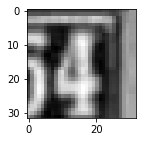

Label for the above image:  4
Predicted label for above image:  [4]


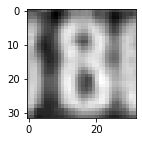

Label for the above image:  8
Predicted label for above image:  [8]


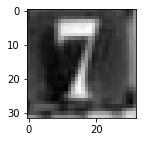

Label for the above image:  7
Predicted label for above image:  [7]


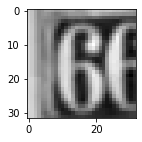

Label for the above image:  6
Predicted label for above image:  [6]


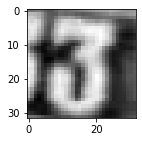

Label for the above image:  3
Predicted label for above image:  [3]


In [37]:
plt.figure(figsize=(2,2))
plt.imshow(X_test[13], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[13])
print("Predicted label for above image: ", model.predict_classes(X_test[13].reshape(1,1024)))


plt.figure(figsize=(2,2))
plt.imshow(X_test[240], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[240])
print("Predicted label for above image: ", model.predict_classes(X_test[240].reshape(1,1024)))



plt.figure(figsize=(2,2))
plt.imshow(X_test[1980], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[1980])
print("Predicted label for above image: ", model.predict_classes(X_test[1980].reshape(1,1024)))



plt.figure(figsize=(2,2))
plt.imshow(X_test[7645], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[7645])
print("Predicted label for above image: ", model.predict_classes(X_test[7645].reshape(1,1024)))


plt.figure(figsize=(2,2))
plt.imshow(X_test[12000], cmap="gray")
plt.show()

print("Label for the above image: ", y_test[12000])
print("Predicted label for above image: ", model.predict_classes(X_test[12000].reshape(1,1024)))

### Conclusion

In our initial model architecture validation accuracy was ~78%. After making the following change our accuracy jumped by 4% to 82%


1) Added one additional hidden layer

2) Increased the number of neurons in first hidden layer to 128

3) selu activation function used

4) Removed batch normalization (normalization taken care by selu activation)

5) Removed dropouts

6) nadam optimizer used

7) Batch Size of 40 was used (1050 images used per batch)

We can futher increase the accuracy of our model by using convolutional layers. 

#### Comparing the performance of two models

Since we have used tensorboard and logged the performance of both the neural networks that we created, we can check the graphs in tensorboard to evaluate the performance

#### Epoch accuracy graph

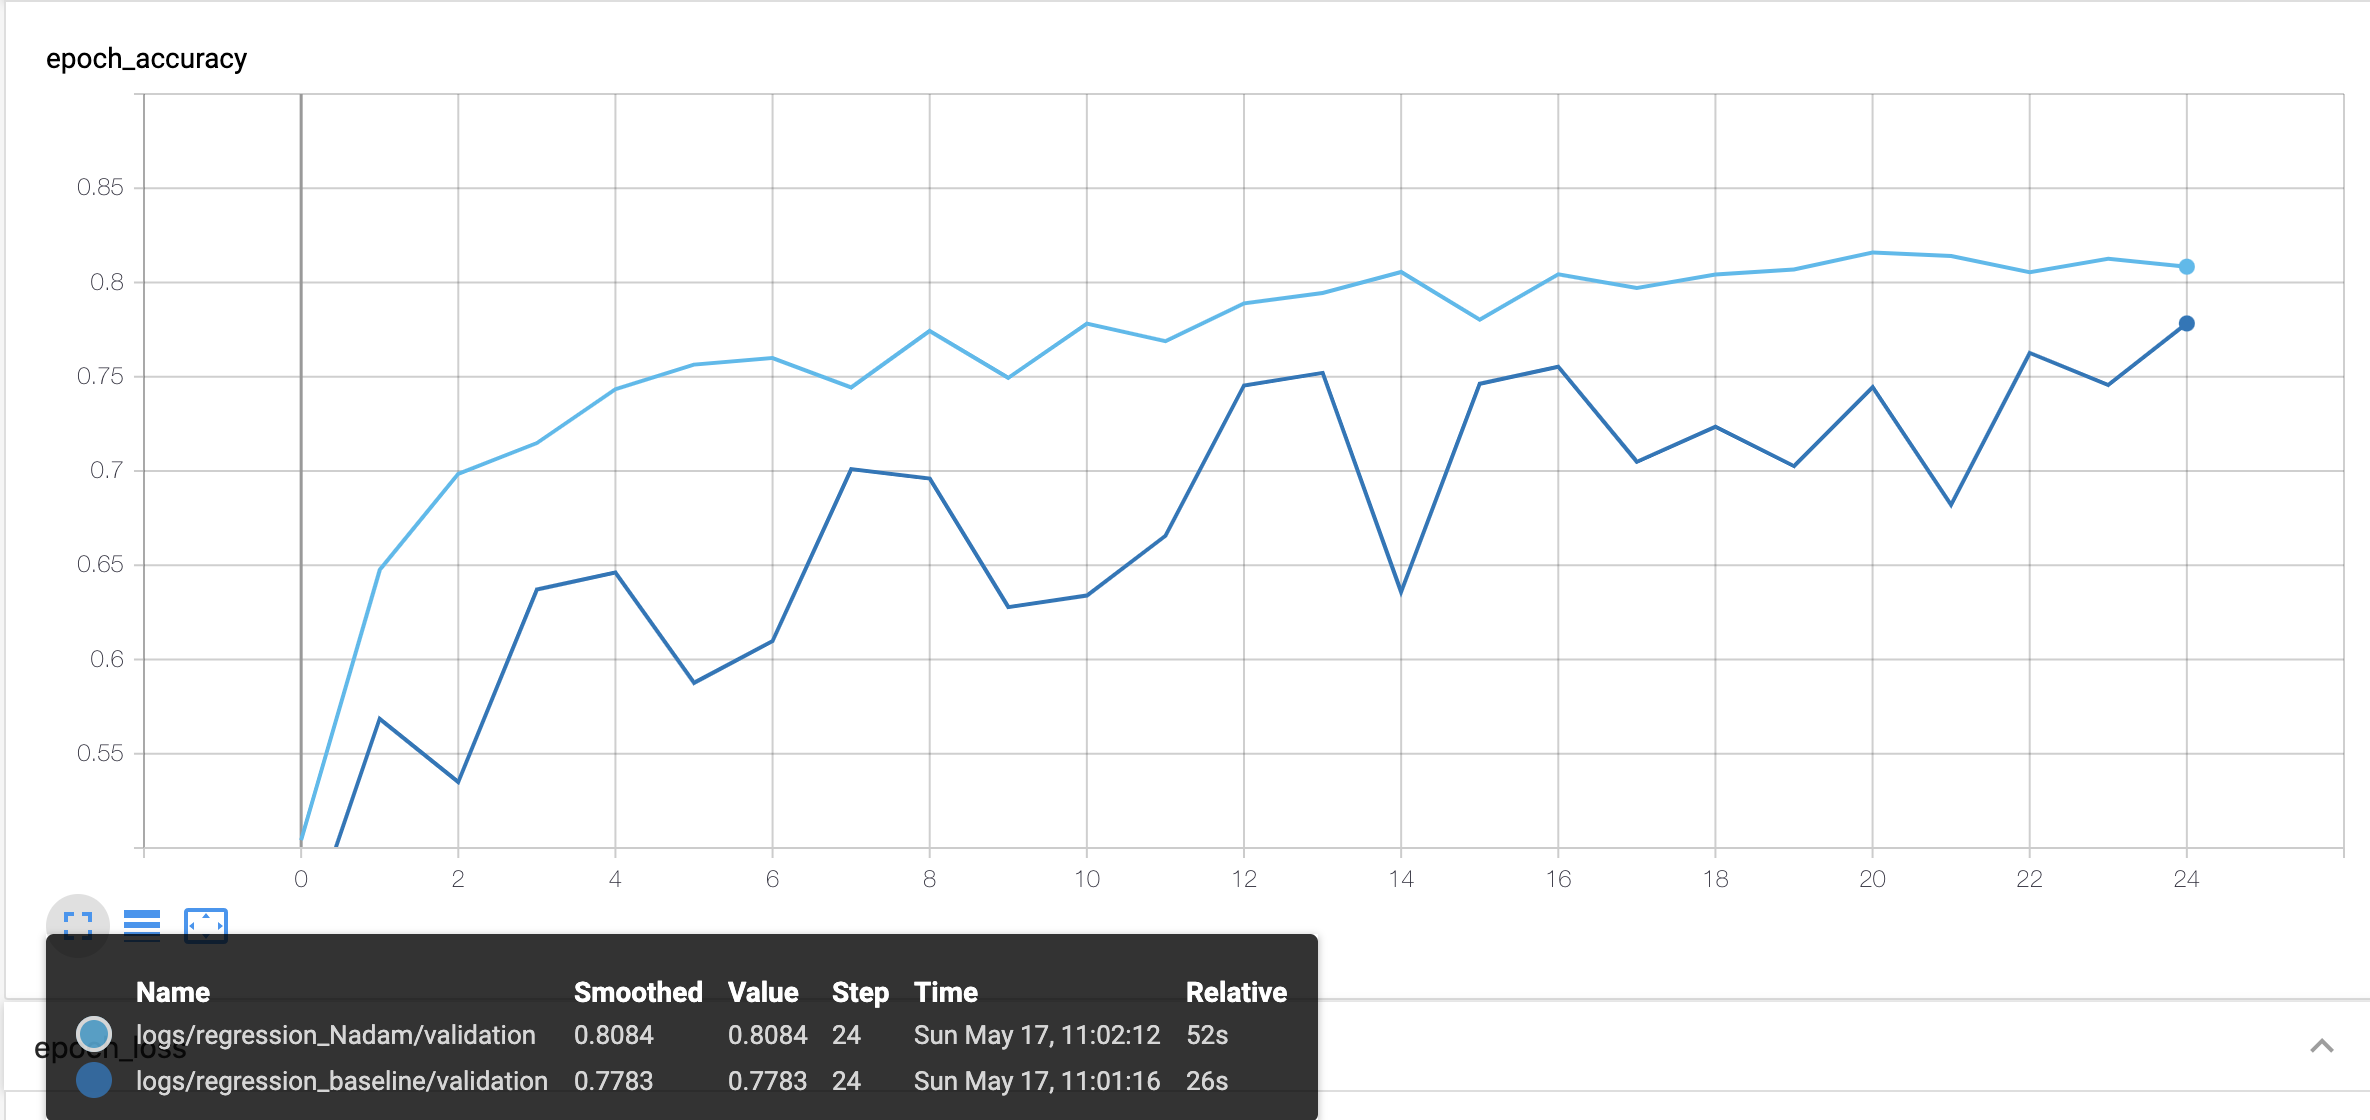

The dark blue curve is for first model and light blue curve is for second model. We can see there is a difference in validation accuracy with second model performing better than the first one. Also the model validation accuracy during epochs vary a lot with first model and the second model is more consistent

#### Epoch loss graph

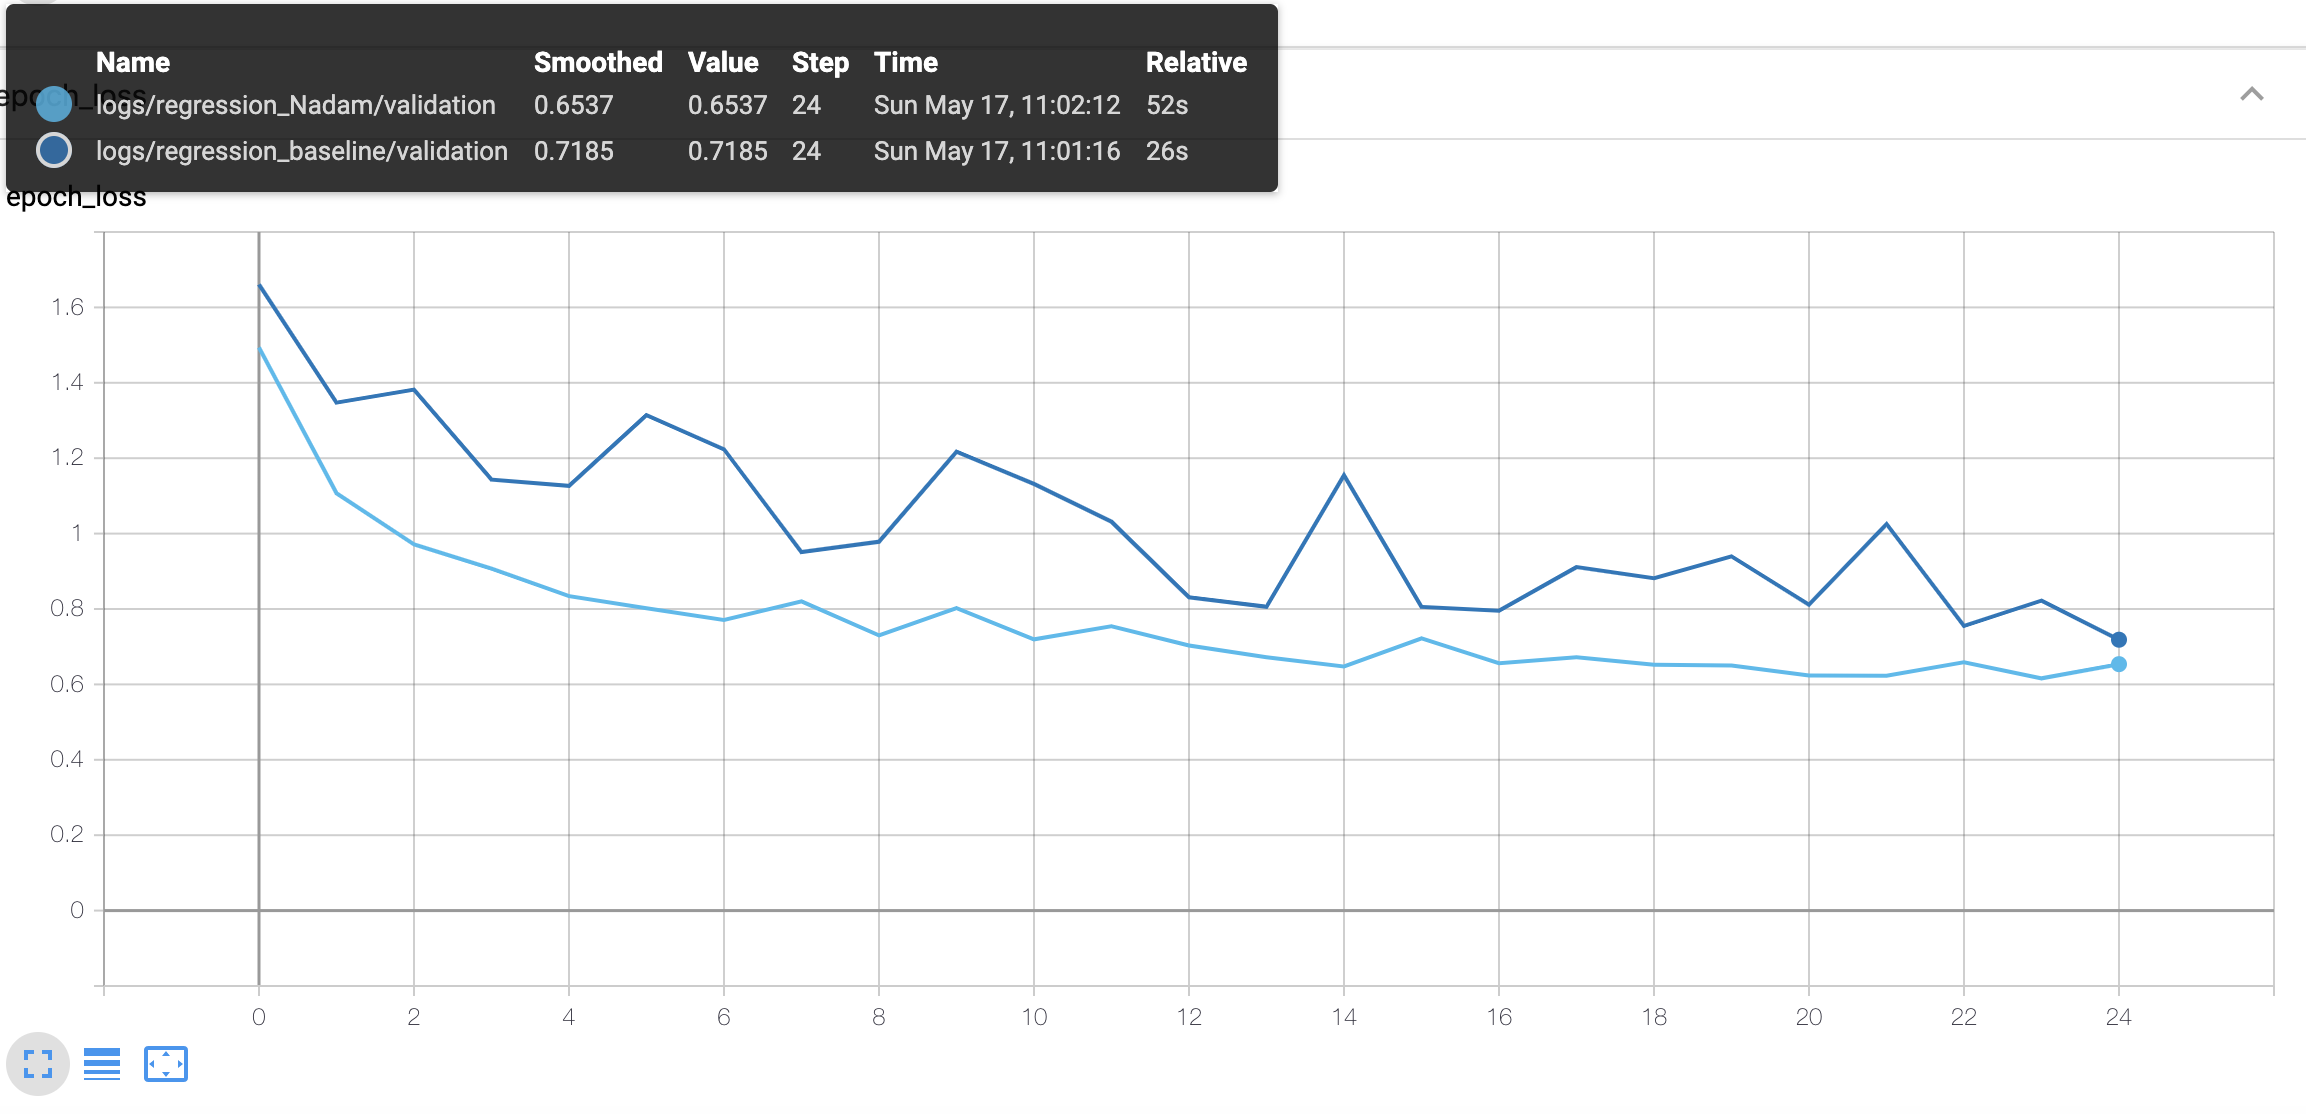

The dark blue curve is for first model and light blue curve is for second model. Again the second model performed better than the first model.